In [120]:
import pandas as pd
import semopy as sm
import seaborn as sns
import matplotlib.pylab as plt

In [121]:
lat_lon_list = [(45, 0), (42, 13), (68,25)]

df1 = pd.read_csv(f"/Users/anand/Documents/data/project_3_data/data/lat_{lat_lon_list[0][0]}_lon_{lat_lon_list[0][1]}.csv", index_col = 0)
df2 = pd.read_csv(f"/Users/anand/Documents/data/project_3_data/data/lat_{lat_lon_list[1][0]}_lon_{lat_lon_list[1][1]}.csv", index_col = 0)
df3 = pd.read_csv(f"/Users/anand/Documents/data/project_3_data/data/lat_{lat_lon_list[2][0]}_lon_{lat_lon_list[2][1]}.csv", index_col = 0)


In [122]:
# sns.pairplot(df1)
# plt.savefig(f"/Users/anand/Documents/data/project_3_data/images/pair_plot_{lat_lon_list[0][0]}_lon_{lat_lon_list[0][1]}.png")

In [123]:
# sns.pairplot(df2)
# plt.savefig(f"/Users/anand/Documents/data/project_3_data/images/pair_plot_{lat_lon_list[1][0]}_lon_{lat_lon_list[1][1]}.png")

In [124]:
# sns.pairplot(df3)
# plt.savefig(f"/Users/anand/Documents/data/project_3_data/images/pair_plot_{lat_lon_list[2][0]}_lon_{lat_lon_list[2][1]}.png")

# What we are interested in?
# This is to test semopy, we will go to more detailed graphs in later part

srrad_spring, tp_spring, temp_spring -> lai_spring
srrad_summer, tp_summer, temp_summer -> lai_summer

lai_spring -> lai_summer

In [186]:
mod = """
# measurement model

lai_spring ~ tp_spring + ssrd_spring + temp_spring
#lai_summer ~ lai_spring
lai_summer ~ ssrd_summer + temp_summer+ tp_summer
swvlall_summer ~ lai_spring
lai_summer ~ swvlall_summer
"""
model = sm.Model(mod)

In [187]:
df = df2

df=(df-df.mean())/df.std()
model.fit(df)

SolverResult(fun=2.077842526008725, success=True, n_it=13, x=array([ 0.19516531,  0.52590774,  0.4450057 , -0.69190324, -0.11630465,
       -0.41734923,  0.01230034, -0.33100845,  0.86672165,  0.73313863,
        0.5596061 ]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

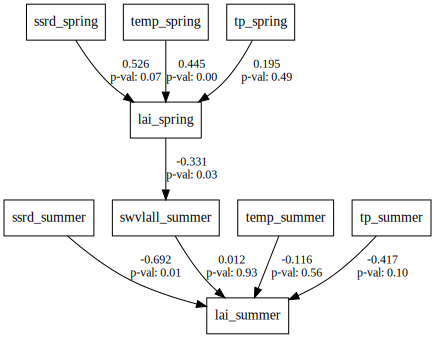

In [188]:
sm.semplot(model, f"images/sem_fit_{lat_lon_list[1][0]}_lon_{lat_lon_list[1][1]}.png")

In [189]:
sm.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,34,42,78.958016,0.00002,264.620532,0.798051,0.701618,0.63141,0.701618,0.750533,0.189044,17.844315,35.857763,2.077843


In [190]:
df_pred = df.copy()
df_pred["lai_summer"] = float('nan')

pred_lai_summer = model.predict(df_pred).lai_summer


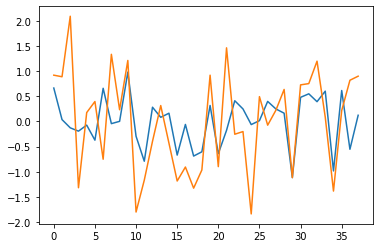

In [191]:
plt.plot(pred_lai_summer.values)
plt.plot(df.lai_summer.values)
